In [1]:
import os
import numpy as np
import time
from astropy.io import fits
import matplotlib.pyplot as plt
import _pickle as cPickle
from multiprocessing import Pool
from blos_binning_helper import get_blos_inst_pixel

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

font = {'size'   : 18}

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

mpl.rc('font', **font)

/tmp/ipykernel_59796/790960243.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
def get_fields_from_pool_map(res):
    res_200 = np.array(res[:350]).reshape(25,14)
    res_120 = np.array(res[350:825]).reshape(25,19)
    res_100 = np.array(res[825:1300]).reshape(25,19)
    res_50 = np.array(res[1300:1800]).reshape(25,20)
    res_30 = np.array(res[1800:]).reshape(25,20)
    
    return res_200,res_120,res_100,res_50,res_30

In [3]:
import copy

def avg_pos_neg(res_200,res_120,res_100,res_50,res_30):
    res_200[1:13,:] = (res_200[1:13,:] + res_200[13:25,:])/2
    res_120[1:13,:] = (res_120[1:13,:] + res_120[13:25,:])/2
    res_100[1:13,:] = (res_100[1:13,:] + res_100[13:25,:])/2
    res_50[1:13,:] = (res_50[1:13,:] + res_50[13:25,:])/2
    res_30[1:13,:] = (res_30[1:13,:] + res_30[13:25,:])/2
    
    return copy.deepcopy(res_200[:13,:]),copy.deepcopy(res_120[:13,:]),copy.deepcopy(res_100[:13,:]),copy.deepcopy(res_50[:13,:]),copy.deepcopy(res_30[:13,:])

In [4]:
import itertools
import multiprocessing

anglesn = ['00','25_9','37','45_5','53','60','66_5','72_6','75_5','78_4','81_4','84_2','87_2',
          'n25_9','n37','n45_5','n53','n60','n66_5','n72_6','n75_5','n78_4','n81_4','n84_2','n87_2']
anglesd = ['00','25_9','37','45_5','53','60','66_5','72_6','75_5','78_4','81_4','84_2','87_2',
          '-25_9','-37','-45_5','-53','-60','-66_5','-72_6','-75_5','-78_4','-81_4','-84_2','-87_2']
dirs = ['ngrey_200','ngrey_120_restart','ngrey_100_restart','ngrey_50','ngrey_30']

s_200 = [200000] + np.arange(201000,219001,1500).tolist()
s_120 = [200000,202000,203000,204000,205000,206000,207000,208000,209000,210000,212000,213000,214000,215000,216000,217000,218000,219000,220000]
s_100 = [200000,202000,203000,204000,205000,206000,207000,208000,209000,210000,212000,213000,214000,215000,216000,217000,218000,219000,220000]
s_50 = [200000] + np.arange(201000,228001,1500).tolist()
s_30 = [200000] + np.arange(201000,228001,1500).tolist()


paramlist_200 = list(itertools.product(anglesd,['ngrey_200G'],s_200))
paramlist_120 = list(itertools.product(anglesn,['ngrey_120G_restart'],s_120))
paramlist_100 = list(itertools.product(anglesn,['ngrey_100G_restart'],s_100))
paramlist_50 = list(itertools.product(anglesd,['ngrey_50G'],s_50))
paramlist_30 = list(itertools.product(anglesd,['ngrey_30G'],s_30))

paramlist = paramlist_200 + paramlist_120 + paramlist_100 + paramlist_50 + paramlist_30

# onepix

In [ ]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='onepix', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/path/to/spinor_files", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_one = pool.map(func,paramlist)

In [6]:
pool.close()

In [7]:
res_one_200,res_one_120,res_one_100,res_one_50,res_one_30 = get_fields_from_pool_map(res_one)
res_one_200a,res_one_120a,res_one_100a,res_one_50a,res_one_30a = avg_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30)

In [8]:
with open(r"./blos_pickles/cmilosqu_200_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_120, output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_one_30, output_file)

# FDT

In [ ]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='FDT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/path/to/spinor_files", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_fdt = pool.map(func,paramlist)

In [10]:
pool.close()

In [11]:
res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30 = get_fields_from_pool_map(res_fdt)
res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [12]:
with open(r"./blos_pickles/cmilosqu_200_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_120, output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_fdt_30, output_file)

# HMI

In [ ]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='HMI', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/path/to/spinor_files", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_hmi = pool.map(func,paramlist)

In [ ]:
pool.close()

In [ ]:
res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30 = get_fields_from_pool_map(res_hmi)
res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [ ]:
with open(r"./blos_pickles/cmilosqu_200_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_120, output_file)

with open(r"./blos_pickles/cmilosqu_100_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hmi_30, output_file)

# HRT

In [ ]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='HRT', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/path/to/spinor_files", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_hrt = pool.map(func,paramlist)

In [ ]:
pool.close()

In [ ]:
res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30 = get_fields_from_pool_map(res_hrt)
res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [ ]:
with open(r"./blos_pickles/cmilosqu_200_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_120, output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_hrt_30, output_file)

# MURaM Res

In [ ]:
def func(params):
    ang = params[0]
    dirs = params[1]
    snap = params[2]
    return get_blos_inst_pixel(f'{dirs}', ang, f'{snap}', 0.35, inst='MURaM', \
                               downscale_mean=False, remainder_mode='round', refwv=6173.341, \
                               dshape=288, pixel_res=20.833333, blos_method='CMILOS', \
                               return_mean=True, default_dir="/path/to/spinor_files", \
                               niter=50, ext='_1551', q_u_0 = False)

pool = multiprocessing.Pool(64)
res_muram = pool.map(func,paramlist)

In [ ]:
pool.close()

In [ ]:
res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30 = get_fields_from_pool_map(res_muram)
res_MURaM_200a,res_MURaM_120a,res_MURaM_100a,res_MURaM_50a,res_MURaM_30a = avg_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30)

In [ ]:
with open(r"./blos_pickles/cmilosqu_200_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_200, output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_120, output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_100, output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_50, output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "wb") as output_file:
    cPickle.dump(res_MURaM_30, output_file)

# Plot results

In [4]:
#load one results
with open(r"./blos_pickles/cmilosqu_200_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)
    
res_one_200a,res_one_120a,res_one_100a,res_one_50a,res_one_30a = avg_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30)

In [5]:
#load hmi results
with open(r"./blos_pickles/cmilosqu_200_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [6]:
#load fdt results
with open(r"./blos_pickles/cmilosqu_200_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [7]:
#load hrt results
with open(r"./blos_pickles/cmilosqu_200_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [8]:
#load MURaM results
with open(r"./blos_pickles/cmilosqu_200_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)
    
res_MURaM_200a,res_MURaM_120a,res_MURaM_100a,res_MURaM_50a,res_MURaM_30a = avg_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30)

# 30G

In [9]:
mu_vals = [0.0486,0.1007,0.1493,0.2014,0.25,0.2986,0.3993,0.5,0.6007,0.7014,0.7986,0.8993,1.0]

In [10]:
res_fdt_30a.shape

(13, 20)

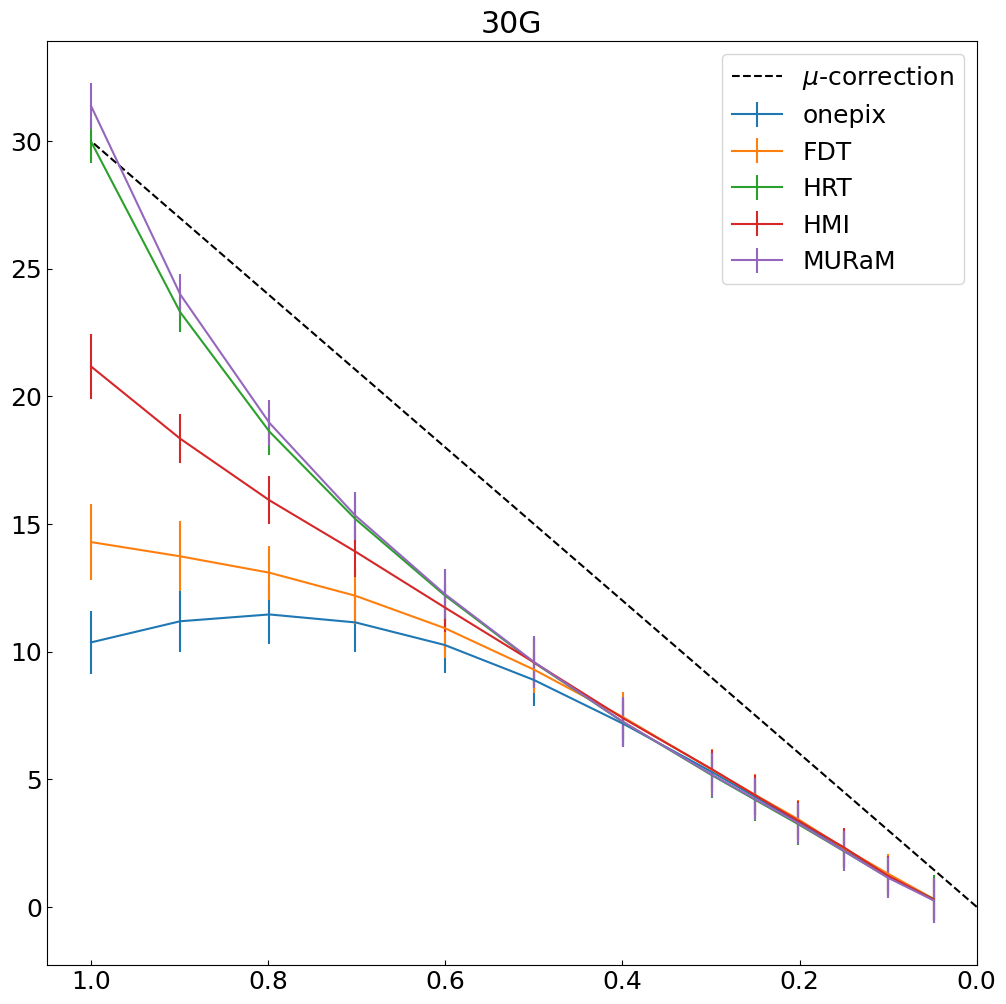

In [11]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_30a.mean(-1), yerr = res_one_30a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_30a.mean(-1), yerr = res_fdt_30a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_30a.mean(-1), yerr = res_hrt_30a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_30a.mean(-1), yerr = res_hmi_30a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_30a.mean(-1), yerr = res_MURaM_30a.std(-1), label = 'MURaM')
# plt.errorbar(mu_vals[::-1], blos_30a.mean(-1), yerr =  blos_30a.std(-1), label = '6Mmx6Mm')
plt.plot(np.linspace(0,1,20),np.linspace(0,30,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("30G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

# 50G

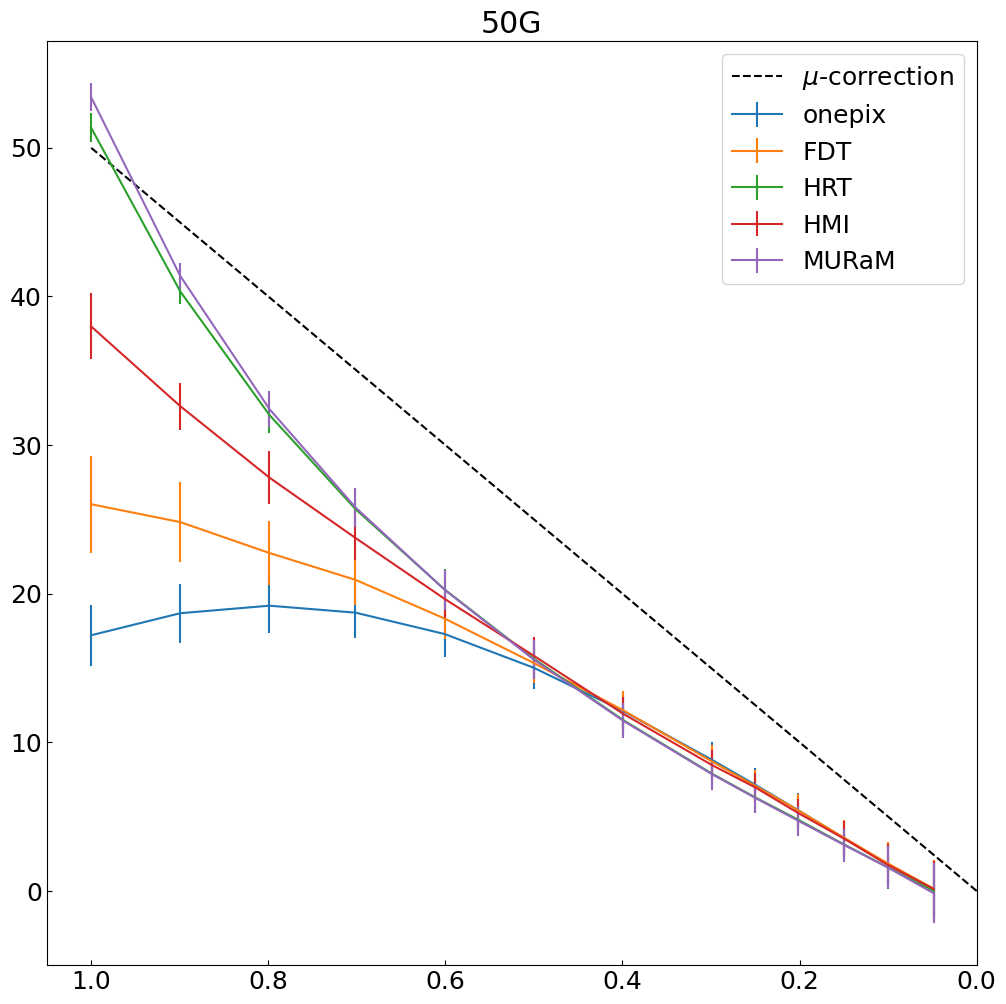

In [12]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_50a.mean(-1), yerr = res_one_50a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_50a.mean(-1), yerr = res_fdt_50a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_50a.mean(-1), yerr = res_hrt_50a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_50a.mean(-1), yerr = res_hmi_50a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_50a.mean(-1), yerr = res_MURaM_50a.std(-1), label = 'MURaM')
plt.plot(np.linspace(0,1,20),np.linspace(0,50,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("50G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

# 100G

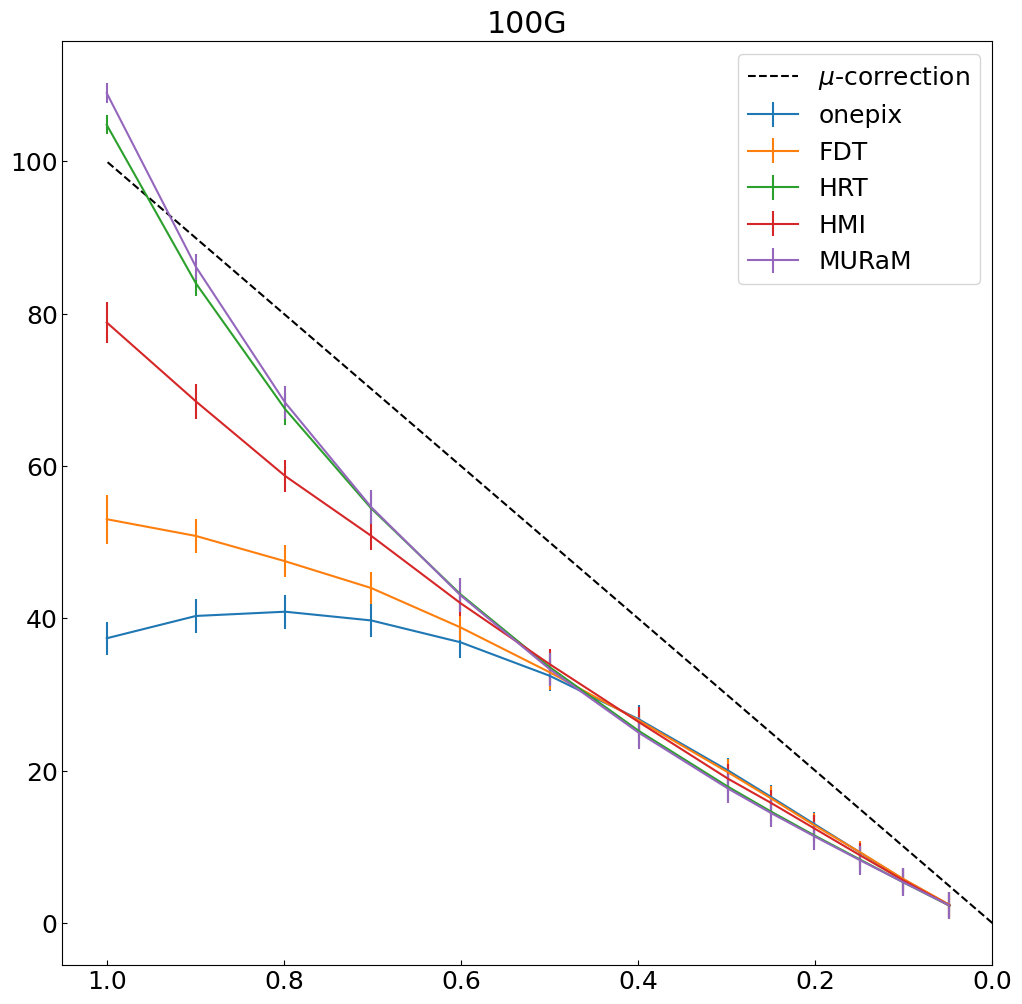

In [13]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_100a.mean(-1), yerr = res_one_100a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_100a.mean(-1), yerr = res_fdt_100a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_100a.mean(-1), yerr = res_hrt_100a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_100a.mean(-1), yerr = res_hmi_100a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_100a.mean(-1), yerr = res_MURaM_100a.std(-1), label = 'MURaM')
plt.plot(np.linspace(0,1,20),np.linspace(0,100,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("100G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

# 120G

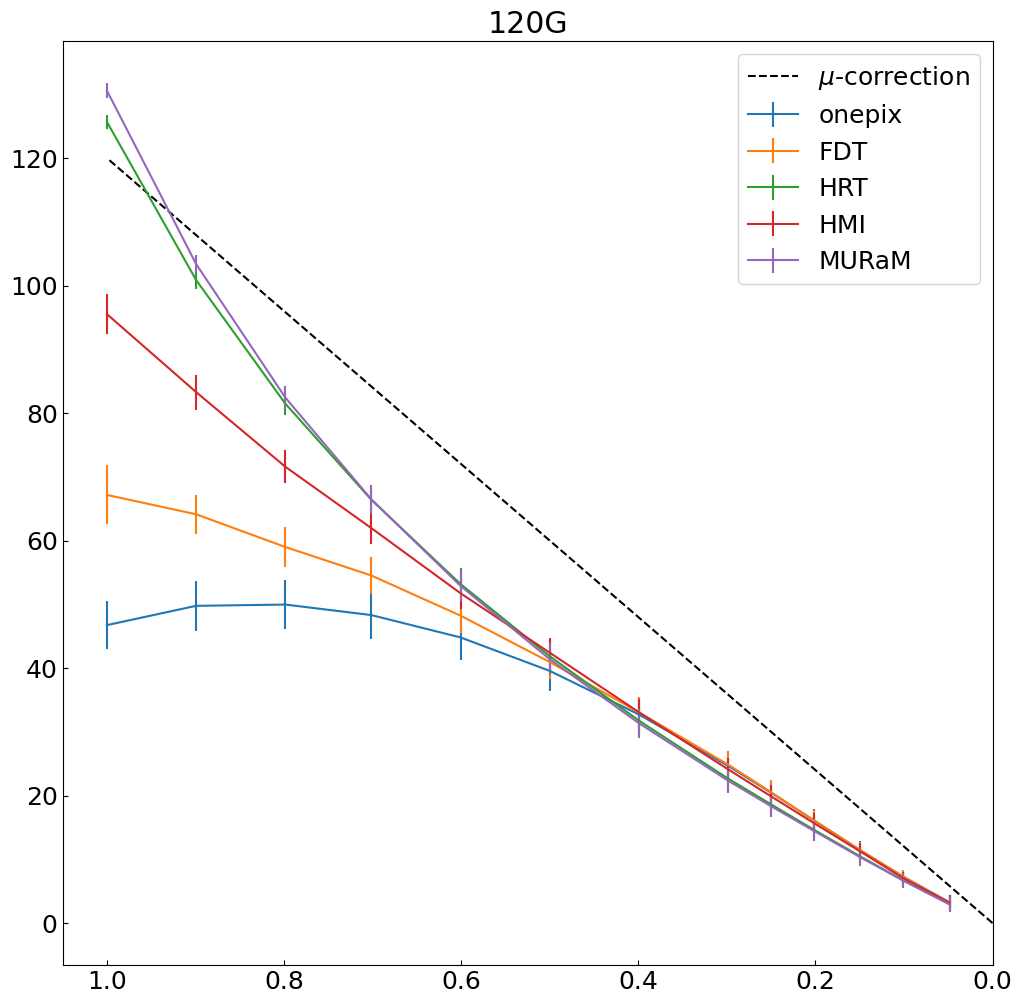

In [14]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_120a.mean(-1), yerr = res_one_120a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_120a.mean(-1), yerr = res_fdt_120a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_120a.mean(-1), yerr = res_hrt_120a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_120a.mean(-1), yerr = res_hmi_120a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_120a.mean(-1), yerr = res_MURaM_120a.std(-1), label = 'MURaM')
plt.plot(np.linspace(0,1,20),np.linspace(0,120,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("120G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

# 200G

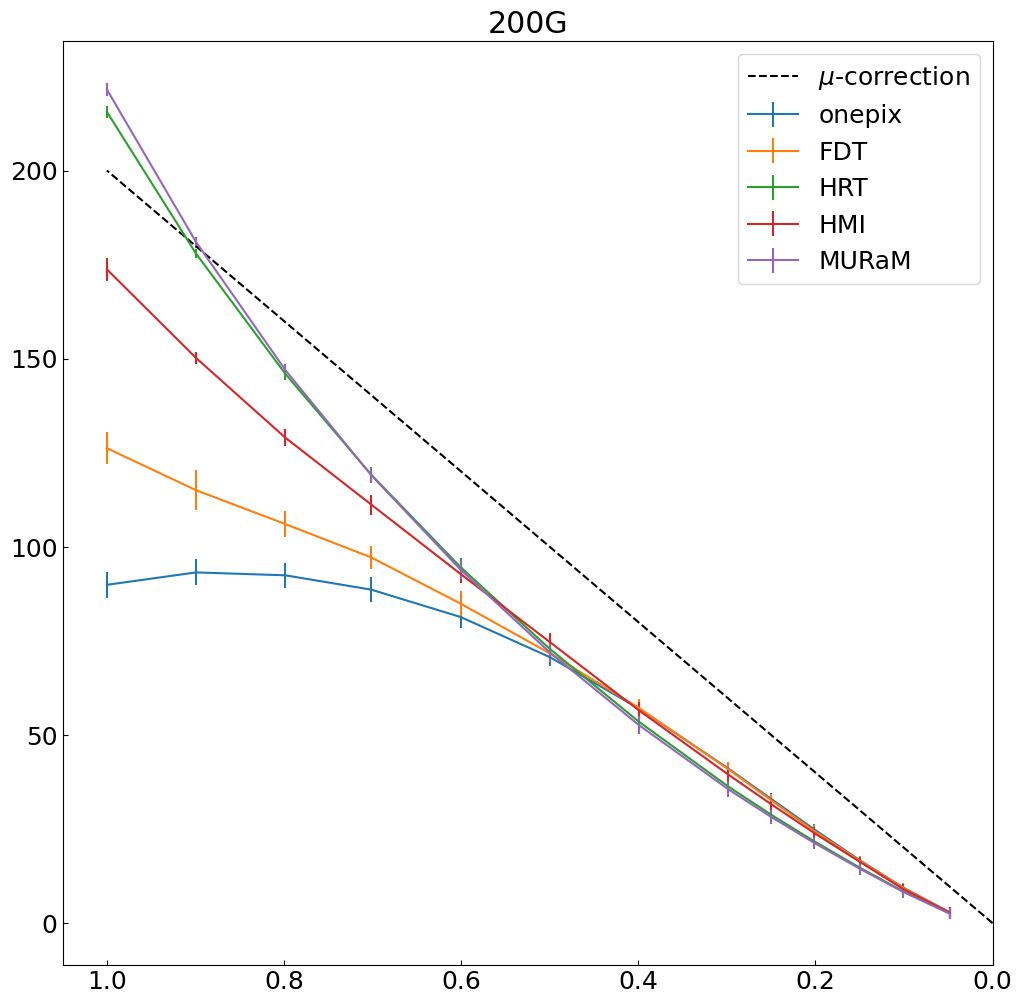

In [15]:
plt.figure(figsize = (12,12))
plt.errorbar(mu_vals[::-1], res_one_200a.mean(-1), yerr = res_one_200a.std(-1), label = 'onepix')
plt.errorbar(mu_vals[::-1], res_fdt_200a.mean(-1), yerr = res_fdt_200a.std(-1), label = 'FDT')
plt.errorbar(mu_vals[::-1], res_hrt_200a.mean(-1), yerr = res_hrt_200a.std(-1), label = 'HRT')
plt.errorbar(mu_vals[::-1], res_hmi_200a.mean(-1), yerr = res_hmi_200a.std(-1), label = 'HMI')
plt.errorbar(mu_vals[::-1], res_MURaM_200a.mean(-1), yerr = res_MURaM_200a.std(-1), label = 'MURaM')
plt.plot(np.linspace(0,1,20),np.linspace(0,200,20), '--', color = 'black', label = r"$\mu$-correction")
plt.title("200G")
plt.legend()
plt.xlim(1.05,0)
plt.show()

In [38]:
res_one_200[4,:]

array([83.06207429, 80.82304273, 83.45623468, 83.4680927 , 81.45497263,
       85.58422161, 80.99744596, 77.96208757, 54.69641414, 81.50977878,
       81.10884388, 21.34335344, 80.99318157, 77.29808587])

In [39]:
res_one_200[13+3,:]

array([8.32942949e+01, 8.03441487e+01, 8.31785385e+01, 8.22512715e+01,
       8.20594243e+01, 8.63662599e+01, 8.03094358e+01, 7.79544814e+01,
       7.29285522e+01, 8.44886246e+01, 8.19655754e+01, 3.58789654e-03,
       7.96261618e+01, 7.56984363e+01])